In [138]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor


In [139]:
# Loading the data set
ins = pd.read_csv("data/insurance.csv")
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [140]:
# Converting the smoker column into numerical format
ins.dropna(subset=['smoker'], inplace=True)     # The null value was dropped.
ins['smoker'] = ins['smoker'].map({'yes': 1, 'no': 0})
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [141]:
# Converting the sex column into numerical format
ins['sex'] = ins['sex'].map({'male': 0, 'female': 1})
ins

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [142]:
# Getting the X and Y variables
X = ins[['sex', 'smoker','bmi', 'age']]
y = ins['charges']

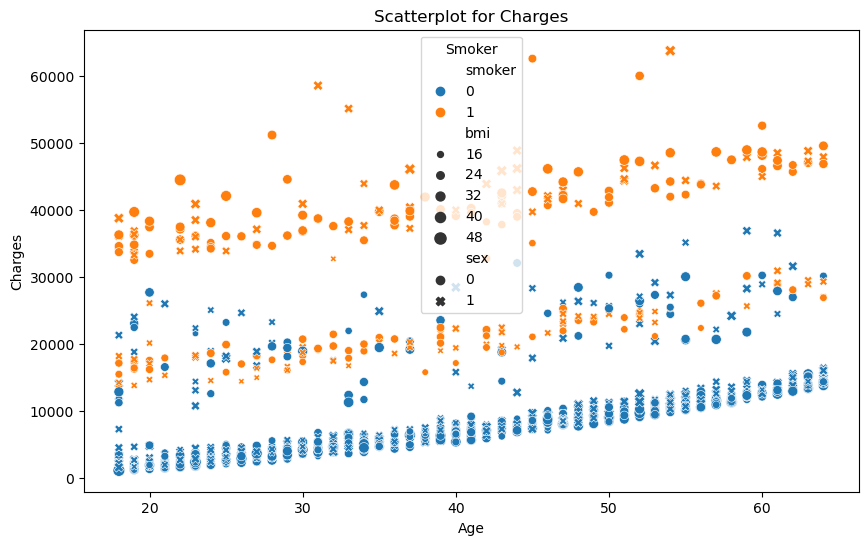

In [143]:
# Plotting scatterplot for x and y variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ins, x='age', y='charges', hue='smoker', style='sex', size='bmi')
plt.title('Scatterplot for Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()
plt.close()

In [144]:
# Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [145]:
# # Creating and Training the model
model = RandomForestRegressor()

# Training the model
model.fit(x_train, y_train)

RandomForestRegressor()

In [146]:
# Create the predictions
predictions = model.predict(x_test)
predictions

array([19921.88025175, 16908.16523717, 13770.31559552, 21311.73313529,
       15594.90759763, 10676.21765592,  7015.13453127, 15594.90759763,
        8386.29375738, 10019.96194913, 10676.21765592, 15944.9364891 ,
       18466.01966039, 12702.26892687, 12993.51490635, 15944.9364891 ,
       20309.09414863,  7070.5736008 ,  8386.29375738,  8984.54766778,
       15594.90759763, 15702.47637696, 19921.88025175, 16908.16523717,
       11686.77379748,  9295.71224872,  8822.52730151, 11076.4676338 ,
       10019.96194913, 16001.72068053, 11076.4676338 , 16979.25018826,
       16662.66088461, 15630.44331043, 10253.83613722, 11729.32663032,
       15587.25810082,  8822.52730151, 11076.4676338 ,  8984.54766778,
       12548.53999744, 11850.24626314, 12273.37447123, 11978.99981175,
        7015.13453127,  4170.95970483, 15944.9364891 , 12164.0806234 ,
       11729.32663032, 14587.55873065, 13826.61572003,  9372.72324269,
       13770.31559552, 15594.90759763, 11978.99981175,  8822.52730151,
      

In [147]:
#Checking the precision, recall and f1-score
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 9050.634826225001
